# LAB 1: IVP's

In [4]:
import numpy as np
from matplotlib import pyplot as plt

### PROBLEM 1

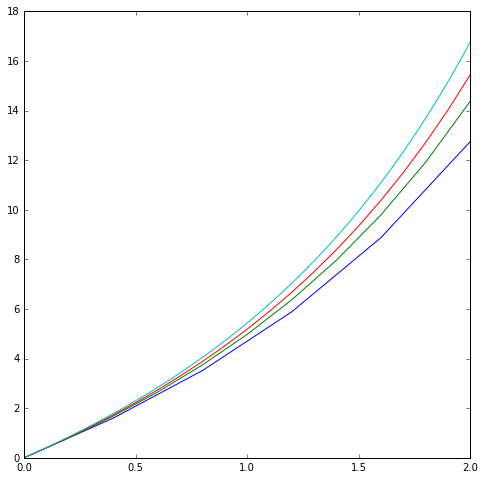

In [14]:
def euler(y, y0, a, b, h, plot=False):
    n = int((b-a) / h) + 1
    x_list = np.linspace(a,b,n)
    y_approx = np.zeros(n)
    yi = 0
    for i in xrange(n-1):
        y_approx[i+1] = y_approx[i] + h * y(x_list[i], y_approx[i])
    if plot==True:
        plt.plot(x_list, y_approx)
    return y_approx

y = lambda x,y : y - 2*x + 4
y0 = 0
a = 0
b = 2
h_list = np.array([0.4, 0.2, 0.1])
plt.figure(figsize=(8,8))
for h in h_list:
    euler(y, y0, a, b, h, plot=True)
sol = lambda x : -2 + 2*x + 2*np.exp(x)
x_list = np.linspace(a,b,100)
plt.plot(x_list, sol(x_list))
plt.show()

### PROBLEM 2

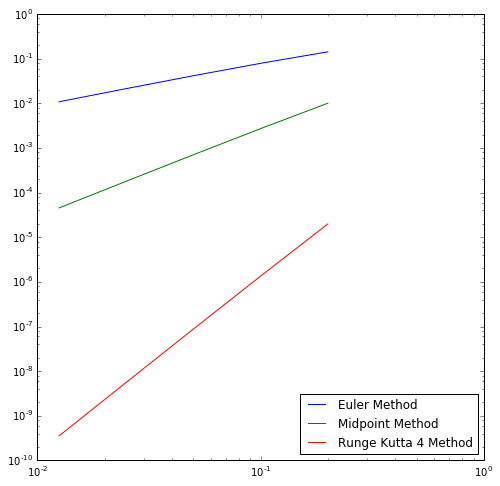

In [13]:
def midpoint(y, y0, a, b, h, plot=False):
    n = int((b-a) / h) + 1
    x_list = np.linspace(a,b,n)
    y_approx = np.zeros(n)
    y_approx[0] = y0
    for i in xrange(n-1):
        y_approx[i+1] = y_approx[i] + h*y(x_list[i] + h/2., y_approx[i] + (h/2.)*y(x_list[i], y_approx[i]))
    if plot==True:
        plt.plot(x_list, y_approx)
    return y_approx

def RK4(y, y0, a, b, h, plot=False):
    n = int((b-a) / h) + 1
    x_list = np.linspace(a,b,n)
    y_approx = np.zeros(n)
    y_approx[0] = y0
    for i in xrange(n-1):
        k1 = y(x_list[i], y_approx[i])
        k2 = y(x_list[i] + (h/2.), y_approx[i] + (h/2.)*k1)
        k3 = y(x_list[i] + (h/2.), y_approx[i] + (h/2.)*k2)
        k4 = y(x_list[i+1], y_approx[i] + h*k3)
        y_approx[i+1] = y_approx[i] + (h/6.)*(k1 + 2*k2 + 2*k3 + k4)
    if plot==True:
        plt.plot(x_list, y_approx)
    return y_approx

y = lambda x,y : y - 2*x + 4
y0 = 0
a = 0
b = 2
h_list = np.array([0.2, 0.1, 0.05, 0.025, 0.0125])
sol = -2 + 2*(2) + 2*np.exp(2)
eul_err = np.zeros(len(h_list))
md_err = np.zeros(len(h_list))
rk_err = np.zeros(len(h_list))
for idx, h in enumerate(h_list):
    eul_err[idx] = np.abs(euler(y, y0, a, b, h)[-1] - sol)/sol
    md_err[idx] = np.abs(midpoint(y, y0, a, b, h)[-1] - sol)/sol
    rk_err[idx] = np.abs(RK4(y, y0, a, b, h)[-1] - sol)/sol

plt.figure(figsize=(8,8))
plt.loglog(h_list, eul_err, label='Euler Method')
plt.loglog(h_list, md_err, label='Midpoint Method')
plt.loglog(h_list, rk_err, label='Runge Kutta 4 Method')
plt.legend(loc=4)
plt.show()

### PROBLEM 3

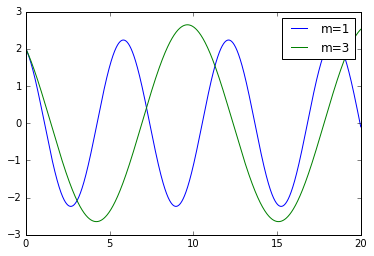

In [23]:
def RK4_n(y, y0, a, b, h, plot=False):
    n = int((b-a) / h) + 1
    x_list = np.linspace(a,b,n)
    y_approx = np.zeros((n,len(y0)))
    y_approx[0] = y0
    for i in xrange(n-1):
        k1 = y(x_list[i], y_approx[i])
        k2 = y(x_list[i] + (h/2.), y_approx[i] + (h/2.)*k1)
        k3 = y(x_list[i] + (h/2.), y_approx[i] + (h/2.)*k2)
        k4 = y(x_list[i+1], y_approx[i] + h*k3)
        y_approx[i+1] = y_approx[i] + (h/6.)*(k1 + 2*k2 + 2*k3 + k4)
    if plot==True:
        plt.plot(x_list, y_approx[:,0])
    return y_approx

z = lambda x,y: np.array([y[1],-1*float(y[0])])
a = 0
b = 20
y0 = np.array([2,-1])
h = 0.01
RK4_n(z, y0, a, b, h, plot=True)
z2 = lambda x,y: np.array([y[1],-1/3.*float(y[0])])
RK4_n(z2, y0, a, b, h, plot=True)
plt.legend(['m=1','m=3'], loc=1)
plt.show()

### PROBLEM 4

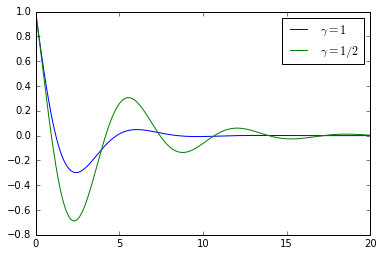

Using 200 subintervals we get:
With gamma of 1/2, y(20) is approximately: 0.00329061859393
   This approximation has relative error of: 3.11376250581e-05
With gamma of 1, y(20) is approximately: 2.80845603631e-05
   This approximation has relative error of: 3.24185909591e-05


In [32]:
def relative1(approx):
    t = 0.003290516135070259013581111877
    return np.abs(approx - t) / np.abs(t)

def relative2(approx):
    t = 0.000028083649930759203640138098
    return np.abs(approx - t) / np.abs(t)

z = lambda x, y : np.array([y[1], -1.* y[1] - y[0]])
a = 0
b = 20
y0 = np.array([1,-1])
h = .1
approx1 = RK4_n(z, y0, a, b, h, plot=True)
z = lambda x, y : np.array([y[1], -0.5* y[1] - y[0]])
approx2 = RK4_n(z, y0, a, b, h, plot=True)
plt.legend([r'$\gamma = 1$',r'$\gamma = 1/2$'])
plt.show()

print 'Using 200 subintervals we get:'
print 'With gamma of 1/2, y(20) is approximately: {}'.format(approx2[-1][0])
print '   This approximation has relative error of: {}'.format(relative1(approx2[-1][0]))
print 'With gamma of 1, y(20) is approximately: {}'.format(approx1[-1][0])
print '   This approximation has relative error of: {}'.format(relative2(approx1[-1][0]))

### PROBLEM 5

In [31]:
var_list = [[0.5,1.5],[0.1,1.1],[0,1]]
for var in var_list:
    z = lambda x, y: np.array([y[1], np.cos(var[1]*x) - .5*var[0]*y[1] - y[0]])
    a = 0
    b = 40
    y0 = np.array([2.,-1.])
    h = 0.1
    approx = RK4_n(z, y0, a, b, h, plot=True)
plt.legend([r'$\gamma=.5, \omega=1.5$',r'$\gamma=.1, \omega=1.1$',r'$\gamma=0, \omega=1$'], loc=0)
plt.show()
